In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
data_train = pd.read_csv("/content/drive/MyDrive/Train (4).csv",nrows=5600)
data_test = pd.read_csv("/content/drive/MyDrive/Test (1).csv",nrows=2600)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
print(data_train.shape)
print(data_test.shape)

(5600, 19)
(2600, 18)


In [8]:
data_train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [9]:
data_train.tail()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
5595,00ab66cc543fc027768ee2d9364b403dd594b448,DAKAR,K > 24 month,500.0,1.0,5040.0,1680.0,2.0,NaN,63.0,181.0,29.0,NaN,NaN,NO,20,All-net 5000= 20000off+20000on;30d,1.0,0
5596,00ab6f5770acfa6dcce5bc6866926f292ea62e8f,DAKAR,K > 24 month,13000.0,13.0,13005.0,4335.0,15.0,60341.0,4.0,19.0,2.0,NaN,NaN,NO,61,"Data:1000F=5GB,7d",13.0,0
5597,00ab75232b997c60ce0e53688b460ddb9a0db74b,THIES,K > 24 month,700.0,1.0,700.0,233.0,2.0,0.0,0.0,4.0,NaN,NaN,NaN,NO,8,VAS(IVR_Radio_Daily),1.0,0
5598,00ab7ac21c09b8ecd5d7abaefaf93bf85b00d08f,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NO,4,NaN,NaN,1
5599,00aba45e0ae943d177cdbee6f835b16abe7d4849,DAKAR,K > 24 month,NaN,NaN,500.0,167.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NO,4,NaN,NaN,1


In [10]:
data_train.describe()


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,3631.000000,3631.000000,3693.000000,3693.000000,3693.000000,2795.000000,3545.000000,3239.000000,2232.000000,436.000000,351.000000,5600.000000,3237.000000,5600.000000
mean,5389.320848,11.213164,5385.562415,1795.196588,13.632006,3880.794275,274.248801,92.743439,22.036290,9.091743,9.746439,27.716071,8.981464,0.185179
std,6900.116288,12.779579,6941.404329,2313.791684,14.144806,25619.394315,861.189083,195.905416,55.348916,47.852127,54.535138,22.282132,11.409001,0.388477
min,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,6.000000,2990.000000,997.000000,9.000000,300.000000,26.000000,29.000000,6.000000,1.000000,1.000000,24.000000,5.000000,0.000000
75%,7100.000000,15.000000,7291.000000,2430.000000,19.000000,2752.500000,148.000000,96.000000,21.000000,3.000000,5.000000,50.000000,11.000000,0.000000
max,91500.000000,92.000000,93195.000000,31065.000000,83.000000,926547.000000,11987.000000,3280.000000,1374.000000,820.000000,932.000000,62.000000,120.000000,1.000000


In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         5600 non-null   object 
 1   REGION          3410 non-null   object 
 2   TENURE          5600 non-null   object 
 3   MONTANT         3631 non-null   float64
 4   FREQUENCE_RECH  3631 non-null   float64
 5   REVENUE         3693 non-null   float64
 6   ARPU_SEGMENT    3693 non-null   float64
 7   FREQUENCE       3693 non-null   float64
 8   DATA_VOLUME     2795 non-null   float64
 9   ON_NET          3545 non-null   float64
 10  ORANGE          3239 non-null   float64
 11  TIGO            2232 non-null   float64
 12  ZONE1           436 non-null    float64
 13  ZONE2           351 non-null    float64
 14  MRG             5600 non-null   object 
 15  REGULARITY      5600 non-null   int64  
 16  TOP_PACK        3237 non-null   object 
 17  FREQ_TOP_PACK   3237 non-null   f

In [12]:
data_train.isnull().sum()

user_id              0
REGION            2190
TENURE               0
MONTANT           1969
FREQUENCE_RECH    1969
REVENUE           1907
ARPU_SEGMENT      1907
FREQUENCE         1907
DATA_VOLUME       2805
ON_NET            2055
ORANGE            2361
TIGO              3368
ZONE1             5164
ZONE2             5249
MRG                  0
REGULARITY           0
TOP_PACK          2363
FREQ_TOP_PACK     2363
CHURN                0
dtype: int64

In [13]:
print(data_train['REGION'].value_counts())

DAKAR          1321
THIES           473
SAINT-LOUIS     325
LOUGA           243
KAOLACK         239
DIOURBEL        178
TAMBACOUNDA     139
KAFFRINE        120
FATICK          109
KOLDA           102
MATAM            85
ZIGUINCHOR       69
SEDHIOU           7
Name: REGION, dtype: int64


In [14]:
print(data_train['TENURE'].value_counts())

K > 24 month     5328
I 18-21 month     109
H 15-18 month      61
G 12-15 month      46
J 21-24 month      28
F 9-12 month       18
E 6-9 month         6
D 3-6 month         4
Name: TENURE, dtype: int64


In [15]:
print(data_train['MRG'].value_counts())

NO    5600
Name: MRG, dtype: int64


In [16]:
print(data_train['CHURN'].value_counts())

0    4563
1    1037
Name: CHURN, dtype: int64


array([[<AxesSubplot:title={'center':'MONTANT'}>,
        <AxesSubplot:title={'center':'FREQUENCE_RECH'}>,
        <AxesSubplot:title={'center':'REVENUE'}>,
        <AxesSubplot:title={'center':'ARPU_SEGMENT'}>],
       [<AxesSubplot:title={'center':'FREQUENCE'}>,
        <AxesSubplot:title={'center':'DATA_VOLUME'}>,
        <AxesSubplot:title={'center':'ON_NET'}>,
        <AxesSubplot:title={'center':'ORANGE'}>],
       [<AxesSubplot:title={'center':'TIGO'}>,
        <AxesSubplot:title={'center':'ZONE1'}>,
        <AxesSubplot:title={'center':'ZONE2'}>,
        <AxesSubplot:title={'center':'REGULARITY'}>],
       [<AxesSubplot:title={'center':'FREQ_TOP_PACK'}>,
        <AxesSubplot:title={'center':'CHURN'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

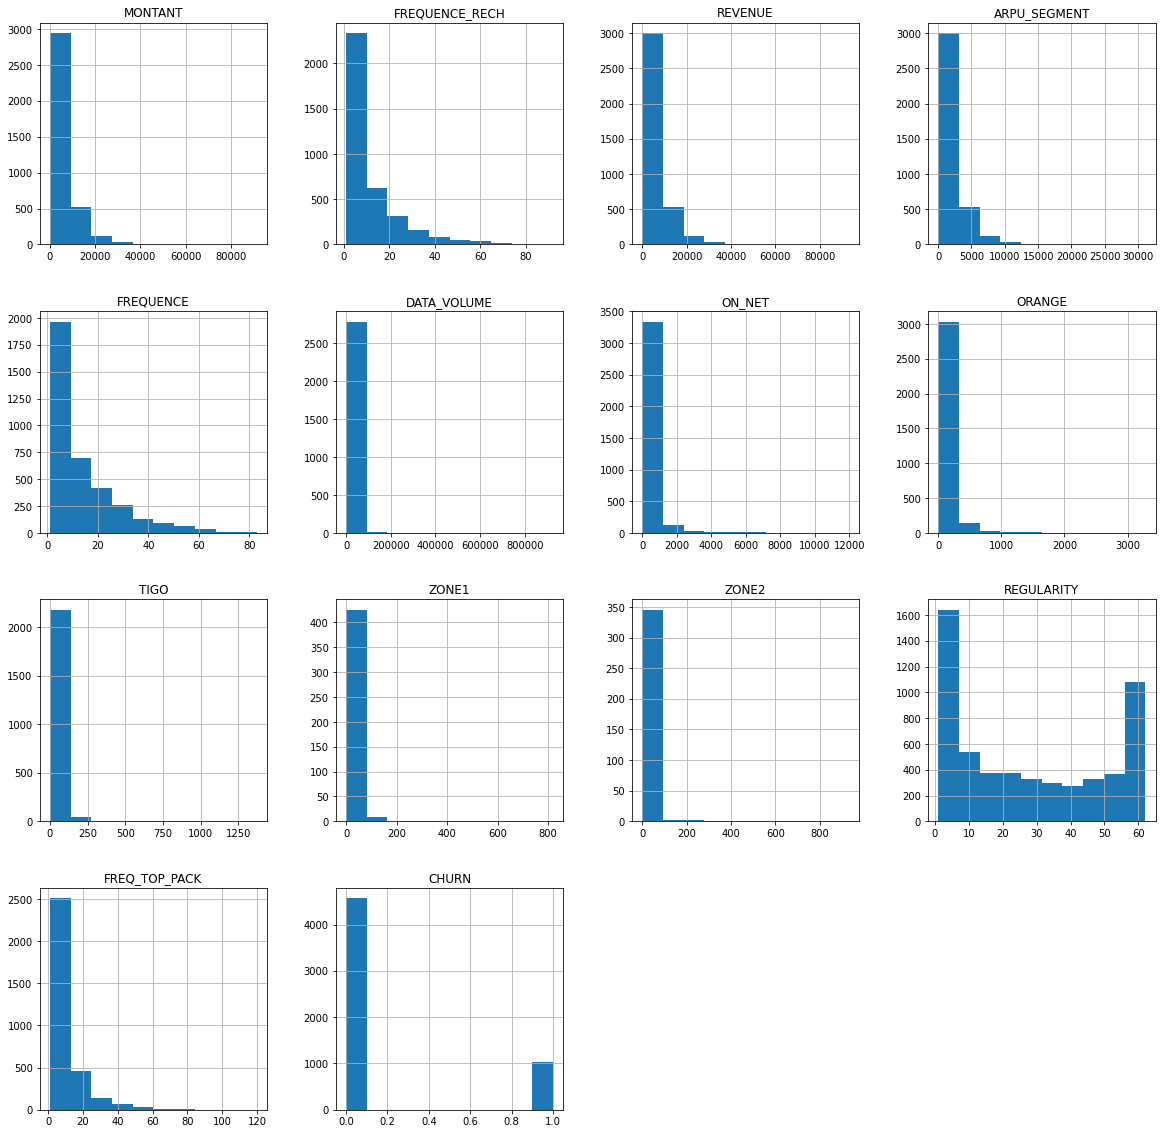

In [17]:
data_train.hist(figsize=(20,20))

Text(0.5, 0, 'REGION')

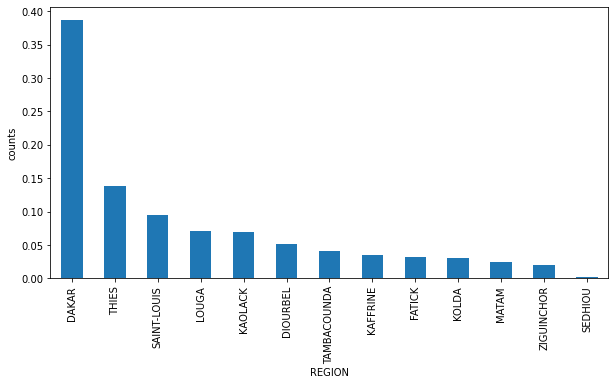

In [18]:
plt.figure(figsize=(10,5))
data_train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

Text(0.5, 0, 'TENURE')

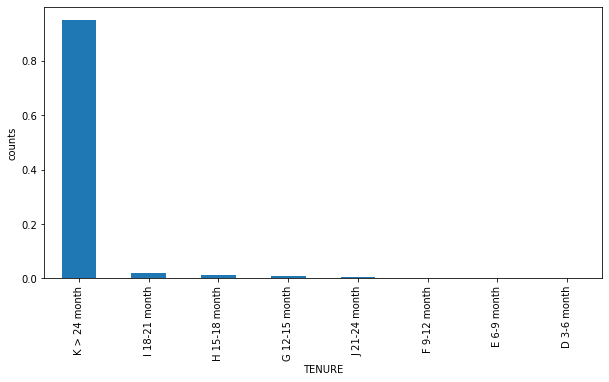

In [19]:
plt.figure(figsize=(10,5))
data_train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

Text(0.5, 0, 'MRG')

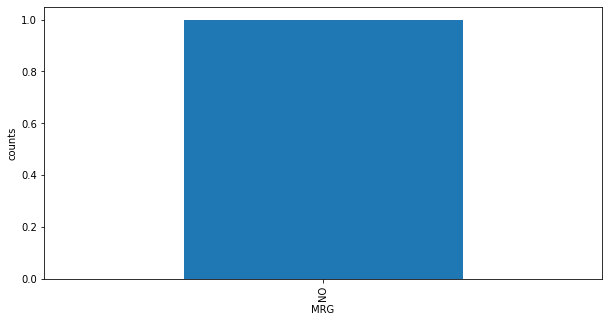

In [20]:
plt.figure(figsize=(10,5))
data_train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

Text(0.5, 0, 'Churn')

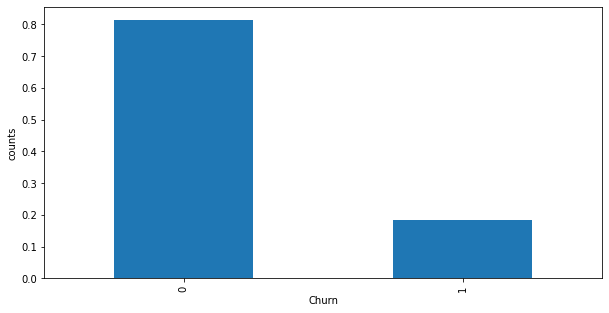

In [21]:
plt.figure(figsize=(10,5))
data_train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

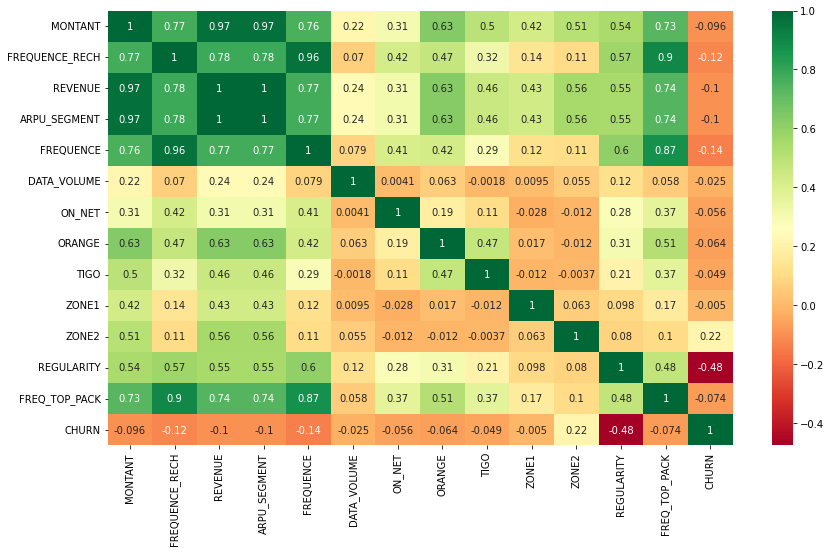

In [22]:
corrmat= data_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

g=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
data_train['REGION'].fillna((data_train['REGION'].mode()[0]), inplace=True)
data_train['TENURE'].fillna((data_train['TENURE'].mode()[0]), inplace=True)

In [24]:
data_train['MONTANT'].fillna((data_train['MONTANT'].median()), inplace=True)
data_train['FREQUENCE_RECH'].fillna((data_train['FREQUENCE_RECH'].median()), inplace=True)
data_train['REVENUE'].fillna((data_train['REVENUE'].median()), inplace=True)
data_train['ARPU_SEGMENT'].fillna((data_train['ARPU_SEGMENT'].median()), inplace=True)
data_train['FREQUENCE'].fillna((data_train['FREQUENCE'].median()), inplace=True)
data_train['DATA_VOLUME'].fillna((data_train['DATA_VOLUME'].median()), inplace=True)
data_train['ON_NET'].fillna((data_train['ON_NET'].median()), inplace=True)
data_train['ORANGE'].fillna((data_train['ORANGE'].median()), inplace=True)
data_train['TIGO'].fillna((data_train['TIGO'].median()), inplace=True)
data_train['ZONE1'].fillna((data_train['ZONE1'].median()), inplace=True)
data_train['ZONE2'].fillna((data_train['ZONE2'].median()), inplace=True)
data_train['FREQ_TOP_PACK'].fillna((data_train['FREQ_TOP_PACK'].median()), inplace=True)

In [25]:
data_train = data_train.drop(["MRG","TOP_PACK"],axis = 1)

In [26]:
data_train.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [27]:
data_train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,I 18-21 month,3000.0,6.0,2990.0,997.0,9.0,300.0,26.0,29.0,6.0,1.0,1.0,4,5.0,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,DAKAR,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,300.0,90.0,46.0,7.0,1.0,1.0,17,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,1.0,1.0,62,11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,300.0,39.0,24.0,6.0,1.0,1.0,11,2.0,0


<AxesSubplot:>

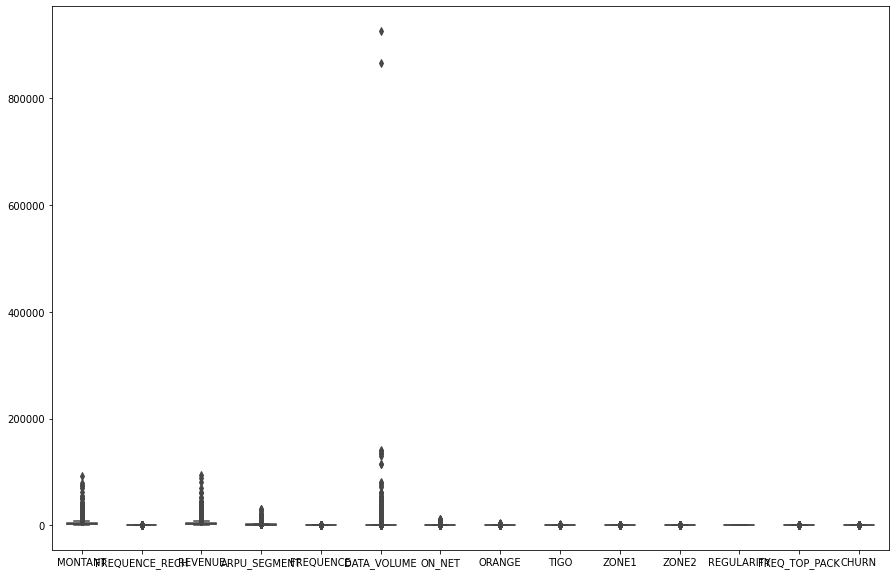

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_train, width=0.5)

<AxesSubplot:xlabel='FREQUENCE_RECH'>

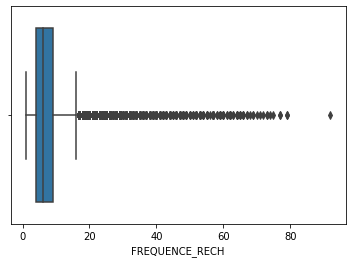

In [29]:
sns.boxplot(data_train['FREQUENCE_RECH'])

In [30]:
Q1 = data_train.FREQUENCE_RECH.quantile(0.25)
Q3 = data_train.FREQUENCE_RECH.quantile(0.75)
IQR = Q3 - Q1

In [31]:
threshold = 1.5 * IQR

In [32]:
outliers = data_train[(data_train['FREQUENCE_RECH'] < Q1 - threshold) | (data_train['FREQUENCE_RECH'] > Q3 + threshold)]

In [33]:
data_train = data_train.drop(outliers.index)

<AxesSubplot:xlabel='FREQUENCE_RECH'>

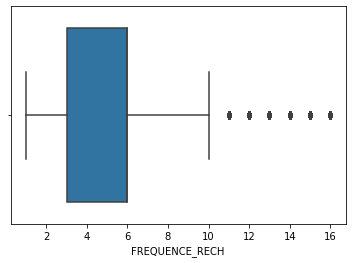

In [34]:
sns.boxplot(data_train['FREQUENCE_RECH'])

<AxesSubplot:xlabel='REVENUE'>

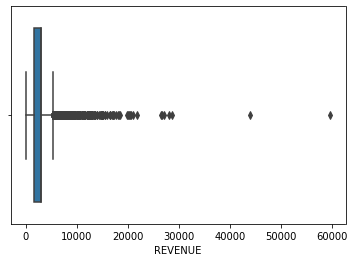

In [35]:
sns.boxplot(data_train['REVENUE'])

In [36]:
Q1 = data_train.REVENUE.quantile(0.25)
Q3 = data_train.REVENUE.quantile(0.75)
IQR = Q3 - Q1

In [37]:
threshold = 1.5 * IQR

In [38]:
outliers = data_train[(data_train['REVENUE'] < Q1 - threshold) | (data_train['REVENUE'] > Q3 + threshold)]

In [39]:
data_train = data_train.drop(outliers.index)

<AxesSubplot:xlabel='ARPU_SEGMENT'>

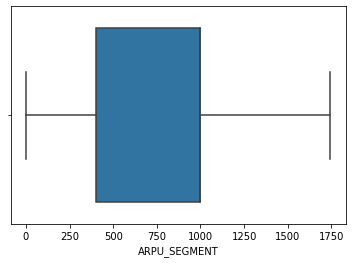

In [40]:
sns.boxplot(data_train['ARPU_SEGMENT'])

<AxesSubplot:xlabel='FREQUENCE'>

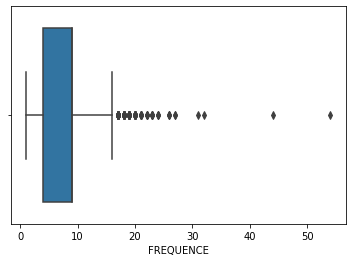

In [41]:
sns.boxplot(data_train['FREQUENCE'])

In [42]:
Q1 = data_train.FREQUENCE.quantile(0.25)
Q3 = data_train.FREQUENCE.quantile(0.75)
IQR = Q3 - Q1

In [43]:
threshold = 1.5 * IQR

In [44]:
outliers = data_train[(data_train['FREQUENCE'] < Q1 - threshold) | (data_train['FREQUENCE'] > Q3 + threshold)]

In [45]:
data_train = data_train.drop(outliers.index)

<AxesSubplot:xlabel='FREQUENCE'>

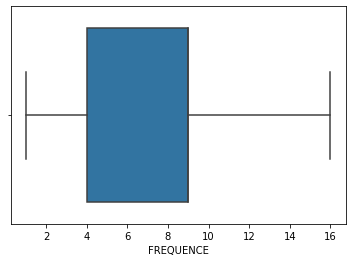

In [46]:
sns.boxplot(data_train['FREQUENCE'])

<AxesSubplot:xlabel='REGULARITY'>

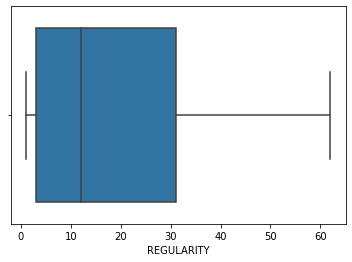

In [47]:
sns.boxplot(data_train['REGULARITY'])

In [48]:
Q1 = data_train.REGULARITY.quantile(0.25)
Q3 = data_train.REGULARITY.quantile(0.75)
IQR = Q3 - Q1

In [49]:
threshold = 1.5 * IQR

In [50]:
outliers = data_train[(data_train['REGULARITY'] < Q1 - threshold) | (data_train['REGULARITY'] > Q3 + threshold)]

In [51]:
data_train = data_train.drop(outliers.index)

<AxesSubplot:xlabel='REGULARITY'>

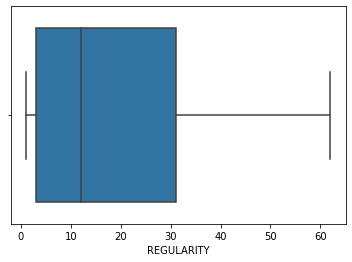

In [52]:
sns.boxplot(data_train['REGULARITY'])

In [53]:
data_train.shape

(4188, 17)

In [54]:
data_train.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [55]:
data_train = data_train.sample(frac = 0.1)
data_train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
2464,004af2e54d1c11e073db55fc0db4c051772f1b00,SAINT-LOUIS,K > 24 month,2150.0,6.0,2149.0,716.0,11.0,0.0,91.0,86.0,1.0,1.0,1.0,61,2.0,0
4553,008a1566b40106443473f8a275b355dcc3d3d7c6,DAKAR,K > 24 month,3000.0,6.0,2990.0,997.0,9.0,300.0,26.0,29.0,6.0,1.0,1.0,3,5.0,0
2145,0040a8b3baaf7c55268e6731fcb2f2ac92720c06,TAMBACOUNDA,K > 24 month,1500.0,3.0,1348.0,449.0,13.0,300.0,0.0,6.0,6.0,1.0,1.0,11,5.0,0
4017,0078e6465bec68f15c9b213ea634d300dfed0c12,DAKAR,K > 24 month,3000.0,6.0,2990.0,997.0,9.0,300.0,26.0,29.0,6.0,1.0,1.0,18,5.0,0
29,0000f17ac6952b019f535d30790d1cb438bd60b4,DAKAR,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,2412.0,26.0,0.0,6.0,1.0,1.0,20,1.0,0


In [56]:
data_train.tail(6)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
2028,003d7236a9700fd0a7d47c2bcfcd469669e58465,DAKAR,I 18-21 month,2400.0,11.0,2400.0,800.0,13.0,510.0,16.0,2.0,1.0,1.0,1.0,21,11.0,0
5229,009fcea22d193fa28eafb38623742e592703a29f,KAFFRINE,K > 24 month,4700.0,6.0,4541.0,1514.0,9.0,6270.0,1.0,1.0,0.0,1.0,1.0,61,3.0,0
1583,00309c3f2b38e1c2c6023b87a180193d33ea6c67,LOUGA,K > 24 month,3000.0,6.0,2990.0,997.0,9.0,300.0,26.0,29.0,6.0,1.0,1.0,8,5.0,0
4685,008de14f607ac56cceade0e5fa9f25c076ca748b,ZIGUINCHOR,K > 24 month,2000.0,4.0,1852.0,617.0,5.0,0.0,1.0,33.0,6.0,1.0,1.0,24,3.0,0
4879,0094252d7a5ce14bf5d9698a175882a042ffcf4a,DAKAR,K > 24 month,1200.0,3.0,1199.0,400.0,6.0,300.0,28.0,1.0,4.0,1.0,1.0,28,2.0,0
5483,00a7691154d542ec2a5078e00b3fd4d68e2e407c,DAKAR,K > 24 month,4000.0,4.0,3985.0,1328.0,7.0,300.0,1.0,15.0,49.0,1.0,1.0,12,5.0,0


In [57]:
X = data_train.drop(["user_id","CHURN"], axis = 1)
y = data_train["CHURN"]

In [58]:
X.isnull().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [59]:
class LabelEncoder:
    def __init__(self):
        self.labels = {}
        self.unknown_label = -1

    def fit(self, data):
        unique_values = set(data)
        for i, value in enumerate(unique_values):
            self.labels[value] = i

    def transform(self, data):
        transformed_data = []
        for value in data:
            if value in self.labels:
                transformed_data.append(self.labels[value])
            else:
                transformed_data.append(self.unknown_label)
        return transformed_data

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [60]:
le = LabelEncoder()
data_train["REGION"] =le.fit_transform(data_train["REGION"])
data_train["TENURE"] = le.fit_transform(data_train["TENURE"])

In [61]:
import numpy as np

class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.var_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.var_ = np.var(X, axis=0)

    def transform(self, X):
        X_scaled = (X - self.mean_) / np.sqrt(self.var_)
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [62]:
scaler = StandardScaler()

In [63]:
data_train[["REGION","TENURE","MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "TIGO", "ZONE1", "ZONE2", "REGULARITY", "FREQ_TOP_PACK"]] = scaler.fit_transform(data_train[["REGION","TENURE","MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT", "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "TIGO", "ZONE1", "ZONE2", "REGULARITY", "FREQ_TOP_PACK"]])

In [64]:
print(data_train.isna().sum())

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64


In [65]:
data_train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
2464,004af2e54d1c11e073db55fc0db4c051772f1b00,1.781551,0.233973,-0.134016,0.415969,-0.065510,-0.066658,1.171016,-0.446172,0.485836,2.422349,-0.734343,-0.085272,-0.099428,2.356683,-1.022364,0
4553,008a1566b40106443473f8a275b355dcc3d3d7c6,0.083099,0.233973,0.578062,0.415969,0.610637,0.610968,0.599489,-0.226767,-0.161605,0.057239,-0.126020,-0.085272,-0.099428,-0.900560,0.505712,0
2145,0040a8b3baaf7c55268e6731fcb2f2ac92720c06,-2.464580,0.233973,-0.678547,-0.777805,-0.709498,-0.710524,1.742543,-0.226767,-0.420581,-0.897104,-0.126020,-0.085272,-0.099428,-0.451285,0.505712,0
4017,0078e6465bec68f15c9b213ea634d300dfed0c12,0.083099,0.233973,0.578062,0.415969,0.610637,0.610968,0.599489,-0.226767,-0.161605,0.057239,-0.126020,-0.085272,-0.099428,-0.058170,0.505712,0
29,0000f17ac6952b019f535d30790d1cb438bd60b4,0.083099,0.233973,-1.097417,-1.175729,-0.989283,-0.990256,-1.400854,1.317843,-0.161605,-1.146063,-0.126020,-0.085272,-0.099428,0.054149,-1.531723,0


In [66]:
data_train.tail(6)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
2028,003d7236a9700fd0a7d47c2bcfcd469669e58465,0.083099,-2.861861,0.075419,2.405592,0.136289,0.135906,1.742543,-0.073184,-0.261211,-1.063076,-0.734343,-0.085272,-0.099428,0.110308,3.561863,0
5229,009fcea22d193fa28eafb38623742e592703a29f,0.932325,0.233973,2.002220,0.415969,1.857609,1.857705,0.599489,4.139389,-0.410620,-1.104570,-0.856008,-0.085272,-0.099428,2.356683,-0.513006,0
1583,00309c3f2b38e1c2c6023b87a180193d33ea6c67,-1.190741,0.233973,0.578062,0.415969,0.610637,0.610968,0.599489,-0.226767,-0.161605,0.057239,-0.126020,-0.085272,-0.099428,-0.619764,0.505712,0
4685,008de14f607ac56cceade0e5fa9f25c076ca748b,-0.341515,0.233973,-0.259677,-0.379880,-0.304292,-0.305395,-0.543564,-0.446172,-0.410620,0.223211,-0.126020,-0.085272,-0.099428,0.278786,-0.513006,0
4879,0094252d7a5ce14bf5d9698a175882a042ffcf4a,0.083099,0.233973,-0.929869,-0.777805,-0.829291,-0.828687,-0.257801,-0.226767,-0.141683,-1.104570,-0.369349,-0.085272,-0.099428,0.503424,-1.022364,0
5483,00a7691154d542ec2a5078e00b3fd4d68e2e407c,0.083099,0.233973,1.415802,-0.379880,1.410597,1.409169,0.027963,-0.226767,-0.410620,-0.523665,5.105557,-0.085272,-0.099428,-0.395126,0.505712,0


In [67]:
data_train.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [68]:
print(data_train.dtypes)

user_id            object
REGION            float64
TENURE            float64
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
REGULARITY        float64
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object


In [69]:
X = data_train.drop(["user_id","CHURN"], axis = 1)
y = data_train["CHURN"]

In [70]:
y

2464    0
4553    0
2145    0
4017    0
29      0
       ..
5229    0
1583    0
4685    0
4879    0
5483    0
Name: CHURN, Length: 419, dtype: int64

In [71]:
X.isnull().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [72]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [73]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling the minority class using SMOTE
os = RandomOverSampler(0.5)
X_train_resampled, y_train_resampled = os.fit_resample(X_train, y_train)


In [74]:
y_train.value_counts()

0    249
1     86
Name: CHURN, dtype: int64

In [75]:
X_train_resampled.shape

(373, 15)

In [76]:
y_train_resampled.shape

(373,)

In [77]:
y_test.shape

(84,)

In [78]:
y_train.shape

(335,)

In [79]:
X_train_resampled.isnull().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
dtype: int64

In [80]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_resampled)))

Original dataset shape Counter({0: 249, 1: 86})
Resampled dataset shape Counter({0: 249, 1: 124})


In [81]:
X_train_resampled.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK'],
      dtype='object')

In [82]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None
        self.label = None
        self.n_classes_ = None

    def fit(self, X, y, depth=0):
        """Build the decision tree recursively."""
        if self.max_depth is not None and depth >= self.max_depth:
            counter = Counter(y)
            if len(counter) == 0:
                self.label = None
            else:
                self.label = counter.most_common()[0][0]
            return

        if len(set(y)) == 1:
            self.label = y[0]
            return

        best_feature, best_threshold = find_best_split(X, y)
        if best_feature is None or best_threshold is None:
            counter = Counter(y)
            if len(counter) == 0:
                self.label = None
            else:
                self.label = counter.most_common()[0][0]
            return

        self.feature = best_feature
        self.threshold = best_threshold
        left_X, left_y, right_X, right_y = split_data(X, y, best_feature, best_threshold)
        self.left = DecisionTree(max_depth=self.max_depth)
        self.right = DecisionTree(max_depth=self.max_depth)
        self.left.fit(left_X, left_y, depth+1)
        self.right.fit(right_X, right_y, depth+1)

    def predict(self, X):
        """Predict the class labels for the given data."""
        if self.label is not None:
            return np.full((X.shape[0],), self.label)
        if self.left is None and self.right is None:
           return np.full((X.shape[0],), self.label)   
        y = np.zeros((X.shape[0],))
        default_threshold = np.median(X[:, self.feature])
        threshold = self.threshold or default_threshold
        left_indices = X[:, self.feature] <= self.threshold
        right_indices = X[:, self.feature] > self.threshold
        if self.left is not None:
            y[left_indices] = self.left.predict(X[left_indices])
        if self.right is not None:
            y[right_indices] = self.right.predict(X[right_indices])
        return y


In [83]:
import numpy as np

class RandomForestClassifier:
    def __init__(self, n_trees, n_features, max_depth):
        self.n_trees = n_trees
        self.n_features = n_features
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(self._get_bootstrapped_samples(X), self._get_bootstrapped_samples(y))
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        return np.mean(predictions, axis=1) >= 0.5

    def _get_bootstrapped_samples(self, X):
        random_indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
        return X[random_indices]

# create a random forest classifier with 10 trees, 3 features per tree, and a maximum depth of 5
#rfc = RandomForestClassifier(n_trees=10, n_features=3, max_depth=5)

# fit the model on the resampled training data
#rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# calculate cross-validation scores using accuracy as the scoring function
#scores = cross_val_score(rfc, X_train_resampled.values, y_train_resampled.values.ravel(), cv=5, scoring=accuracy_score)

# print the mean and standard deviation of the scores
#print("Cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


In [84]:
def find_best_split(X, y):
    best_gini = 1
    best_feature = None
    best_threshold = None
    
    for feature in range(X.shape[1]):
        feature_values = X[:, feature]
        thresholds = np.unique(feature_values)
        for threshold in thresholds:
            left_indices = np.where(feature_values <= threshold)[0]
            right_indices = np.where(feature_values > threshold)[0]
            
            left_labels = y[left_indices]
            right_labels = y[right_indices]
            
            gini_left = gini_impurity(left_labels)
            gini_right = gini_impurity(right_labels)
            gini = len(left_indices) / len(y) * gini_left + len(right_indices) / len(y) * gini_right
            
            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = threshold
                
    return best_feature, best_threshold
    print(f"feature={best_feature}, threshold={best_threshold}, gini={best_gini}")



In [85]:
def gini_impurity(labels):
    _, counts = np.unique(labels, return_counts=True)
    proportions = counts / len(labels)
    gini = 1 - np.sum(proportions ** 2)
    return gini


In [86]:
def split_data(X, y, feature, threshold):
    left_indices = np.where(X[:, feature] <= threshold)[0]
    right_indices = np.where(X[:, feature] > threshold)[0]
    
    left_X = X[left_indices]
    left_y = y[left_indices]
    
    right_X = X[right_indices]
    right_y = y[right_indices]
    
    return left_X, left_y, right_X, right_y


In [87]:
def predict(self, X):
    if self.left is None and self.right is None:
        return np.full((X.shape[0],), self.label)
    
    if self.threshold is None:
        raise ValueError("Threshold is not set.")
    
    y = np.zeros((X.shape[0],))
    left_indices = X[:, self.feature] <= self.threshold
    right_indices = X[:, self.feature] > self.threshold
    
    if self.left is not None:
        y[left_indices] = self.left.predict(X[left_indices])
    if self.right is not None:
        y[right_indices] = self.right.predict(X[right_indices])
        
    return y


In [88]:
rfc = RandomForestClassifier(n_trees=10, n_features=3, max_depth=5)

In [89]:
rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

In [90]:
#def predict(self, X):
    #if self.left is None and self.right is None:
        #return np.full((X.shape[0],), self.label)

    #if self.threshold is None:
        #raise ValueError("Threshold is not set.")
        
    #y = np.zeros((X.shape[0],))
    #left_indices = X[:, self.feature] <= self.threshold
    #right_indices = X[:, self.feature] > self.threshold
    
    #if self.left is not None:
        #y[left_indices] = self.left.predict(X[left_indices])
    #if self.right is not None:
        #y[right_indices] = self.right.predict(X[right_indices])
        
    #return y


In [91]:
def fit(self, X, y, depth=0):
    if depth == self.max_depth or len(y) < self.min_samples_split:
        self.label = Counter(y).most_common(1)[0][0]
        return

    best_feature, best_threshold = find_best_split(X, y)
    if best_feature is None or best_threshold is None:
        self.label = Counter(y).most_common(1)[0][0]
        return
        
    self.feature = best_feature
    self.threshold = best_threshold
    left_X, left_y, right_X, right_y = split_data(X, y, best_feature, best_threshold)
    self.left = DecisionTree(max_depth=self.max_depth)
    self.right = DecisionTree(max_depth=self.max_depth)
    self.left.fit(left_X, left_y, depth+1)
    self.right.fit(right_X, right_y, depth+1)


In [92]:
#def predict(self, X):
    #if self.left is None and self.right is None:
        #return np.full((X.shape[0],), self.label)
    #y = np.zeros((X.shape[0],))
    #if self.threshold is not None:
        #left_indices = X[:, self.feature] <= self.threshold
        #right_indices = X[:, self.feature] > self.threshold
    #else:
        # all samples in node have same value for feature, set threshold to any value
        #threshold_value = X[0, self.feature]
        #left_indices = X[:, self.feature] <= threshold_value
        #right_indices = X[:, self.feature] > threshold_value
    #if self.left is not None:
        #y[left_indices] = self.left.predict(X[left_indices])
    #if self.right is not None:
        #y[right_indices] = self.right.predict(X[right_indices])
    #return y

In [93]:
#def predict(self, X):
    #if self.left is None and self.right is None:
        #return np.full((X.shape[0],), self.label)
    #y = np.zeros((X.shape[0],))
    #if self.threshold is not None:
        #left_indices = X[:, self.feature] <= self.threshold
        #right_indices = X[:, self.feature] > self.threshold
    #else:
        # all samples in node have same value for feature, set threshold to any value
        #threshold_value = np.median(X[:, self.feature])
        #left_indices = np.ones(X.shape[0], dtype=bool)
        #right_indices = np.ones(X.shape[0], dtype=bool)
    #if self.left is not None:
        #y[left_indices] = self.left.predict(X[left_indices])
    #if self.right is not None:
        #y[right_indices] = self.right.predict(X[right_indices])
    #return y


In [94]:
def predict(self, X):
    if self.left is None and self.right is None:
        return np.full((X.shape[0],), self.label)
    y = np.zeros((X.shape[0],))
    default_threshold = np.median(X[:, self.feature])
    left_indices = X[:, self.feature] <= (self.threshold or default_threshold)
    right_indices = X[:, self.feature] > (self.threshold or default_threshold)
    if self.left is not None:
        y[left_indices] = self.left.predict(X[left_indices])
    if self.right is not None:
        y[right_indices] = self.right.predict(X[right_indices])
    return y


In [95]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features_ = None
        self.n_classes_ = None
        self.root = None
        self.tree = None
        self.class_map_ = {}

    def fit(self, X, y):     
        self.n_features_ = X.shape[1]
        self.root = self._grow_tree(X, y)
        self.classes_ = np.unique(y)
        self.n_classes_ = len(np.unique(y))
        for i, c in enumerate(self.classes_):
          self.class_map_[c] = i
        return self

    def _best_split(self, X, y):
        n_samples,n_features = X.shape
        classes = np.unique(y)
        self.n_classes_ = len(classes)
        self.class_map_ = {c: i for i, c in enumerate(classes)}
        y = np.array([self.class_map_.get(label, -1) for label in y])
        

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / n_samples) ** 2 for n in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, n_samples):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_)if self.class_map_.get(x) is not None)
                gini_right = 1.0 - sum((num_right[x] / (n_samples - i)) ** 2 for x in range(self.n_classes_)if self.class_map_.get(x) is not None)
                gini = (i * gini_left + (n_samples - i) * gini_right) / n_samples
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        if self.n_classes_ is None:
          self.n_classes_ = len(np.unique(y))
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] <= thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)

        return node

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.left is None and node.right is None:
            return node.predicted_class
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)


In [96]:
def _best_split(self, X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)
    self.n_classes_ = len(classes)
    self.class_map_ = {c: i for i, c in enumerate(classes)}
    y = np.array([self.class_map_.get(label, -1) for label in y])

    num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
    best_gini = 1.0 - sum((n / n_samples) ** 2 for n in num_parent)
    best_idx, best_thr = None, None
    for idx in range(n_features):
        thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
        num_left = [0] * self.n_classes_
        num_right = num_parent.copy()
        for i in range(1, n_samples):
            c = classes[i - 1]
            num_left[c] += 1
            num_right[c] -= 1
            gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.n_classes_) if self.class_map_.get(x) is not None)
            gini_right = 1.0 - sum((num_right[x] / (n_samples - i)) ** 2 for x in range(self.n_classes_) if self.class_map_.get(x) is not None)
            gini = (i * gini_left + (n_samples - i) * gini_right) / n_samples
            if thresholds[i] == thresholds[i - 1]:
                continue
            if gini < best_gini:
                best_gini = gini
                best_idx = idx
                best_thr = (thresholds[i] + thresholds[i - 1]) / 2
    return best_idx, best_thr


In [97]:
def predict(self, X):
    if self.left is None and self.right is None:
        return np.full((X.shape[0],), self.label)
    if self.left is None and self.right is None:
      return np.full((X.shape[0],), self.label)  
    y = np.zeros((X.shape[0],))
    default_threshold = np.median(X[:, self.feature])
    left_indices = X[:, self.feature] <= (self.threshold or default_threshold)
    right_indices = X[:, self.feature] > (self.threshold or default_threshold)
    if self.left is not None:
        y[left_indices] = self.left.predict(X[left_indices])
    if self.right is not None:
        y[right_indices] = self.right.predict(X[right_indices])
    return y


In [98]:
y_train_pred = rfc.predict(X_train_resampled.values)

In [99]:
y_train_pred = np.zeros_like(y_train_resampled.ravel())

In [100]:
print(y_train_pred.shape) 

(373,)


In [101]:
if y_train_pred.ndim != 1:
    y_train_pred = np.ravel(y_train_pred)

In [102]:
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

In [103]:
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

In [104]:
print("Training Accuracy:", train_accuracy*100)

Training Accuracy: 66.75603217158177


In [105]:
y_test = y_test.reset_index(drop=True)

In [106]:
y_test_pred = rfc.predict(X_test.values)

In [107]:
y_test_pred = np.zeros_like(y_test)

In [108]:
print(y_test_pred.shape) 

(84,)


In [109]:
if y_test_pred.ndim != 1:
    y_test_pred = np.ravel(y_test_pred)

In [110]:
test_accuracy = accuracy_score(y_test, y_test_pred)

In [111]:
print("Testing Accuracy:", test_accuracy*100)

Testing Accuracy: 79.76190476190477


In [112]:
import random
class RandomizedSearchCV:
    def __init__(self, estimator, param_distributions, cv=5, n_iter=10, random_state=None):
        self.estimator = estimator
        self.param_distributions = param_distributions
        self.cv = cv
        self.n_iter = n_iter
        self.random_state = random_state
        self.best_params_ = None
        self.best_score_ = None
        
    def fit(self, X, y):
        random.seed(self.random_state)
        best_score = None
        best_params = None
        for i in range(self.n_iter):
            params = {}
            for param, distribution in self.param_distributions.items():
                params[param] = random.choice(distribution)
            score = self._cross_validate(params, X, y)
            if best_score is None or score > best_score:
                best_score = score
                best_params = params
        self.best_score_ = best_score
        self.best_params_ = best_params
        
    def _cross_validate(self, params, X, y):
        n_trees = params['n_trees']
        n_features = params['n_features']
        max_depth = params['max_depth']

        kfold = KFold(n_splits=self.cv, shuffle=True, random_state=self.random_state)
        scores = []
        for train_indices, test_indices in kfold.split(X, y):
            X_train = X[train_indices]
            y_train = y[train_indices]
            X_test = X[test_indices]
            y_test = y[test_indices]
            model = self.estimator(n_trees,n_features,max_depth)
            model.fit(X_train, y_train)
            score = model.score(y_test, y_pred)
            scores.append(score)
        return np.mean(scores), np.std(scores)

In [113]:
def fit(self, X, y):
        results = []
        for i in range(self.n_iter):
            params = {k: self._generate_param(k, v) for k, v in self.param_distributions.items()}
            score_mean, score_std = self._cross_validate(params, X, y)
            results.append((params, score_mean, score_std))
        self.results_ = results
        best_params, best_mean, best_std = sorted(results, key=lambda x: x[1], reverse=True)[0]
        self.best_params_ = best_params
        self.best_score_ = best_mean
        self.best_score_std_ = best_std

In [114]:
import numpy as np

class KFold:
    def __init__(self, n_splits=5, shuffle=False, random_state=None):
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state
        
    def split(self, X, y=None):
        n_samples = X.shape[0]
        indices = np.arange(n_samples)
        if self.shuffle:
            if self.random_state is not None:
                np.random.seed(self.random_state)
            np.random.shuffle(indices)
        fold_sizes = np.full(self.n_splits, n_samples // self.n_splits, dtype=np.int)
        fold_sizes[:n_samples % self.n_splits] += 1
        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            test_indices = indices[start:stop]
            train_indices = np.concatenate([indices[:start], indices[stop:]])
            yield train_indices, test_indices
            current = stop


In [115]:
def cross_val_score(estimator, X, y, cv=10, scoring=None):
    """
    Returns the scores for a given estimator and data using k-fold cross-validation.
    estimator: an object that implements the fit and predict methods
    X: array of features
    y: array of targets
    cv: number of folds (default is 10)
    scoring: scoring function to use (default is None, which uses estimator's default)
    """
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    n_samples = X.shape[0]
    fold_size = n_samples // cv
    scores = []
    for i in range(cv):
        start = i * fold_size
        end = start + fold_size
        if i == cv - 1:
            end = n_samples
        test_indices = np.arange(start, end)
        train_indices = np.concatenate((np.arange(0, start), np.arange(end, n_samples)))
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        estimator.fit(X_train, y_train.ravel())
        y_pred = estimator.predict(X_test)
        if scoring is None:
            if hasattr(estimator, 'score'):
                score = estimator.score(X_test, y_test)
            else:
                raise ValueError("No scoring function specified and estimator has no 'score' method")
        else:
            score = scoring(y_test, y_pred)
        scores.append(score)
    return np.array(scores)

In [116]:
def randomized_search(estimator, param_distributions, X, y, n_iter=10, cv=5, random_state=42, scoring='accuracy'):
    best_score = None
    best_params = None
    for i in range(n_iter):
        params = {}
        for param, distribution in param_distributions.items():
            params[param] = np.random.choice(distribution)
        for param, value in params.items():
          setattr(estimator, param, value)

        score = cross_val_score(rfc, X, y, cv=cv, scoring=scoring)
        if best_score is None or score.mean() > best_score:
            best_score = score.mean()
            best_params = params
    return best_score, best_params

In [117]:
def _cross_validate(self, params, X, y):
    n_trees = params['n_trees']
    n_features = params['n_features']

    kfold = KFold(n_splits=self.cv, shuffle=True, random_state=self.random_state)
    scores = []
    for train_indices, test_indices in kfold.split(X, y):
        X_train = X[train_indices][:,:n_features]
        y_train = y[train_indices]
        X_test = X[test_indices][:,:n_features]
        y_test = y[test_indices]
        model = self.estimator(n_trees=params['n_trees'],n_features=params['n_features'])
        model.fit(X_train, y_train)
        score = model.score(y_test, y_pred)
        scores.append(score)
    return np.mean(scores)


In [118]:
estimator = RandomForestClassifier(n_trees=10, n_features=3, max_depth=5)
param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                     'n_trees': [5, 10, 20, 50, 100],
                     'n_features': [5, 10, 20, 30, 40, 50]}

In [119]:
#assert isinstance(estimator, RandomForestClassifier), "estimator must be a RandomForestClassifier object"


In [120]:
#def fit(self, X, y):
    #self.n_features_ = X.shape[1]
    #self.tree_ = self._grow_tree(X, y)
    #self.n_classes_ = len(np.unique(y))
    #return self

#def _grow_tree(self, X, y, depth=0):
    #num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
    #predicted_class = np.argmax(num_samples_per_class)
    #node = Node(predicted_class=predicted_class)
    #...


In [121]:
def _best_split(self, X, y):
    n_samples, n_features = X.shape
    classes = np.unique(y)

    # initialize variables to keep track of the best split
    best_gini = float('inf')
    best_feature, best_threshold = None, None

    # keep track of number of samples for each class on left and right side of split
    num_left = {k: 0 for k in self.class_map_.values()}
    num_right = {k: len(y) for k in self.class_map_.values()}

    # loop over all features and possible thresholds to find best split
    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            # compute gini index for this split
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold
            for i in range(1, n_samples):
                c = y[i]
                if self.class_map_.get(c) is not None:
                    if left_indices[i]:
                        num_left[self.class_map_[c]] += 1
                        num_right[self.class_map_[c]] -= 1
                    else:
                        num_left[self.class_map_[c]] -= 1
                        num_right[self.class_map_[c]] += 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in self.class_map_.values() if num_left[x] > 0)
                gini_right = 1.0 - sum((num_right[x] / (n_samples - i)) ** 2 for x in self.class_map_.values() if num_right[x] > 0)
                gini = (i * gini_left + (n_samples - i) * gini_right) / n_samples

                # update best split if necessary
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

    return best_feature, best_threshold


In [122]:
rfc = RandomForestClassifier(n_trees=10, n_features=3, max_depth=5)
random_search = RandomizedSearchCV(RandomForestClassifier, param_distributions,n_iter=20, cv=10, random_state=42)

In [123]:
print(np.unique(y_train_resampled))


[0 1]


In [124]:
random_search.fit(X_train_resampled.values,y_train_resampled.values)

AttributeError: ignored

In [ ]:
#print(random_search.best_params_)

In [ ]:
#print(random_search.best_score_)